## LSI31008 Elements of Bioinformatics, Assignment 2: Basic sequence statistics, the genetic code and transcription factor binding sites.


Here we will explore the (near) universal genetic code discussed at the lecture. We first load in yeast _S.cerevisiae_ coding sequence downloaded from [SGD](https://downloads.yeastgenome.org/sequence/S288C_reference/orf_dna/). The idea is to evaluate various statistics from the genomic data and think about them in the light of the genetic code. For background reading please have a look of ["JB Plotkin, G Kudla: Synonymous but not the same: the causes and consequences of codon bias"](https://www.nature.com/articles/nrg2899) and ["EV Koonin, AS Novozhilov: Origin and evolution of the genetic code: The universal enigma"](https://iubmb.onlinelibrary.wiley.com/doi/abs/10.1002/iub.146).


The Biopython package offers easy ways to read in FASTA-files and to handle sequences. To install it on the CSC Jupyter environment you need to run the following commands: (Note: you might need to run this separately and then restart this notebook to ensure that the package is available to your session)


In [2]:
import sys
!{sys.executable} -m pip install --user biopython

Import Biopython SeqIO for reading FASTA-files


In [3]:
from Bio import SeqIO
from math import floor
import matplotlib.pyplot as plt


Read the file into a dictionary of SeqRecord objects

Please see the following links for information on using Biopython sequence tools:

https://biopython.org/wiki/SeqIO

https://biopython.org/wiki/SeqRecord

https://biopython.org/wiki/Seq


In [4]:
input_file = 'data/orf_coding.fasta'
records = SeqIO.to_dict(SeqIO.parse(input_file, "fasta"))


See that we have 5917 keys:


In [5]:
ids = list(records.keys())
len(ids)

5917

A single record in the dictionary contains all kinds of data:


In [6]:
records[ids[2]]

SeqRecord(seq=Seq('ATGGCATCCACCGATTTCTCCAAGATTGAAACTTTGAAACAATTAAACGCTTCT...TAA'), id='YAL003W', name='YAL003W', description='YAL003W EFB1 SGDID:S000000003, Chr I from 142174-142253,142620-143160, Genome Release 64-2-1, intron sequence removed, Verified ORF, "Translation elongation factor 1 beta; stimulates nucleotide exchange to regenerate EF-1 alpha-GTP for the next elongation cycle; part of the EF-1 complex, which facilitates binding of aminoacyl-tRNA to the ribosomal A site"', dbxrefs=[])

To get the nucleotide sequence out use `.seq`


In [7]:
sequence = (records[ids[0]]).seq
str(sequence)

'ATGGTACTGACGATTTATCCTGACGAACTCGTACAAATAGTGTCTGATAAAATTGCTTCAAATAAGGGAAAAATCACTTTGAATCAGCTGTGGGATATATCTGGTAAATATTTTGATTTGTCTGATAAAAAAGTTAAACAGTTCGTGCTTTCATGCGTGATATTGAAAAAGGACATTGAGGTGTATTGTGATGGTGCTATAACAACTAAAAATGTGACTGATATTATAGGCGACGCTAATCATTCATACTCGGTTGGGATTACTGAGGACAGCCTATGGACATTATTAACGGGATACACAAAAAAGGAGTCAACTATTGGAAATTCTGCATTTGAACTACTTCTCGAAGTTGCCAAATCAGGAGAAAAAGGGATCAATACTATGGATTTGGCGCAGGTAACTGGGCAAGATCCTAGAAGTGTGACTGGACGTATCAAGAAAATAAACCACCTGTTAACAAGTTCACAACTGATTTATAAGGGACACGTCGTGAAGCAATTGAAGCTAAAAAAATTCAGCCATGACGGGGTGGATAGTAATCCCTATATTAATATTAGGGATCATTTAGCAACAATAGTTGAGGTGGTAAAACGATCAAAAAATGGTATTCGCCAGATAATTGATTTAAAGCGTGAATTGAAATTTGACAAAGAGAAAAGACTTTCTAAAGCTTTTATTGCAGCTATTGCATGGTTAGATGAAAAGGAGTACTTAAAGAAAGTGCTTGTAGTATCACCCAAGAATCCTGCCATTAAAATCAGATGTGTAAAATACGTGAAAGATATTCCAGACTCTAAAGGCTCGCCTTCATTTGAGTATGATAGCAATAGCGCGGATGAAGATTCTGTATCAGATAGCAAGGCAGCTTTCGAAGATGAAGACTTAGTCGAAGGTTTAGATAATTTCAATGCGACTGATTTATTACAAAATCAAGGCCTTGTTATGGAAGAGAAAGAGGATGCTGTAAAGAATGAAGTTCTTCTTAATCGATTTTATCCA

Or `.translate()` for amino acid sequence: (Note: you may need to write your own translation method for some Problems)


In [8]:
str(sequence.translate())

'MVLTIYPDELVQIVSDKIASNKGKITLNQLWDISGKYFDLSDKKVKQFVLSCVILKKDIEVYCDGAITTKNVTDIIGDANHSYSVGITEDSLWTLLTGYTKKESTIGNSAFELLLEVAKSGEKGINTMDLAQVTGQDPRSVTGRIKKINHLLTSSQLIYKGHVVKQLKLKKFSHDGVDSNPYINIRDHLATIVEVVKRSKNGIRQIIDLKRELKFDKEKRLSKAFIAAIAWLDEKEYLKKVLVVSPKNPAIKIRCVKYVKDIPDSKGSPSFEYDSNSADEDSVSDSKAAFEDEDLVEGLDNFNATDLLQNQGLVMEEKEDAVKNEVLLNRFYPLQNQTYDIADKSGLKGISTMDVVNRITGKEFQRAFTKSSEYYLESVDKQKENTGGYRLFRIYDFEGKKKFFRLFTAQNFQKLTNAEDEISVPKGFDELGKSRTDLKTLNEDNFVALNNTVRFTTDSDGQDIFFWHGELKIPPNSKKTPNKNKRKRQVKNSTNASVAGNISNPKRIKLEQHVSTAQEPKSAEDSPSSNGGTVVKGKVVNFGGFSARSLRSLQRQRAILKVMNTIGGVAYLREQFYESVSKYMGSTTTLDKKTVRGDVDLMVESEKLGARTEPVSGRKIIFLPTVGEDAIQRYILKEKDSKKATFTDVIHDTEIYFFDQTEKNRFHRGKKSVERIRKFQNRQKNAKIKASDDAISKKSTSVNVSDGKIKRRDKKVSAGRTTVVVENTKEDKTVYHAGTKDGVQALIRAVVVTKSIKNEIMWDKITKLFPNNSLDNLKKKWTARRVRMGHSGWRAYVDKWKKMLVLAIKSEKISLRDVEELDLIKLLDIWTSFDEKEIKRPLFLYKNYEENRKKFTLVRDDTLTHSGNDLAMSSMIQREISSLKKTYTRKISASTKDLSKSQSDDYIRTVIRSILIESPSTTRNEIEALKNVGNESIDNVIMDMAKEKQIYLHGSKLECTDTLPDILENRGNYKDFGVAFQYRCKVNELLEAGNAIVIN

The following function reads a string by triplets, counts the occurrence of each triplet and returns a dictionary:


In [9]:
def extract_triplets(s):
    size = floor(len(s)/3)
    out = {}
    for i in range(size):
        start = i*3
        end = start + 3
        triplet = s[start:end]
        if triplet in out:
            out[triplet] += 1
        else:
            out[triplet] = 1
    return(out)

Testing that it works:


In [10]:
testi = extract_triplets(str(sequence))
print(testi)
print(testi['AAA'])
print(sum(testi.values()))

{'ATG': 17, 'GTA': 22, 'CTG': 12, 'ACG': 11, 'ATT': 41, 'TAT': 24, 'CCT': 9, 'GAC': 21, 'GAA': 51, 'CTC': 8, 'CAA': 19, 'ATA': 31, 'GTG': 19, 'TCT': 32, 'GAT': 58, 'AAA': 81, 'GCT': 23, 'TCA': 24, 'AAT': 44, 'AAG': 44, 'GGA': 22, 'ATC': 15, 'ACT': 36, 'TTG': 20, 'CAG': 18, 'TGG': 15, 'GGT': 13, 'TTT': 32, 'GTT': 32, 'TTC': 10, 'CTT': 17, 'TGC': 2, 'GAG': 22, 'TGT': 5, 'ACA': 22, 'GGC': 15, 'CAT': 12, 'TAC': 11, 'TCG': 8, 'GGG': 9, 'AGC': 11, 'CTA': 11, 'TTA': 29, 'GCA': 15, 'GCC': 9, 'GCG': 5, 'AGA': 24, 'AGT': 15, 'CGT': 9, 'AAC': 22, 'CAC': 4, 'GTC': 14, 'CCC': 6, 'AGG': 16, 'CGA': 7, 'CGC': 5, 'CCA': 11, 'ACC': 6, 'TCC': 7, 'CCG': 4, 'CGG': 3, 'TAA': 1}
81
1161


The following dictionary may be useful for translating triplets into amino acids: (Note: please check that this is done right)


In [11]:
transl = {
    'AAA': 'Lys', 'AAC': 'Asn', 'AAG': 'Lys', 'AAT': 'Asn',
    'ACA': 'Thr', 'ACC': 'Thr', 'ACG': 'Thr', 'ACT': 'Thr',
    'AGA': 'Arg', 'AGC': 'Ser', 'AGG': 'Arg', 'AGT': 'Ser',
    'ATA': 'Ile', 'ATC': 'Ile', 'ATG': 'Met', 'ATT': 'Ile',
    'CAA': 'Gln', 'CAC': 'His', 'CAG': 'Gln', 'CAT': 'His',
    'CCA': 'Pro', 'CCC': 'Pro', 'CCG': 'Pro', 'CCT': 'Pro',
    'CGA': 'Arg', 'CGC': 'Arg', 'CGG': 'Arg', 'CGT': 'Arg',
    'CTA': 'Leu', 'CTC': 'Leu', 'CTG': 'Leu', 'CTT': 'Leu',
    'GAA': 'Glu', 'GAC': 'Asp', 'GAG': 'Glu', 'GAT': 'Asp',
    'GCA': 'Ala', 'GCC': 'Ala', 'GCG': 'Ala', 'GCT': 'Ala',
    'GGA': 'Gly', 'GGC': 'Gly', 'GGG': 'Gly', 'GGT': 'Gly',
    'GTA': 'Val', 'GTC': 'Val', 'GTG': 'Val', 'GTT': 'Val',
    'TAA': 'Stop', 'TAC': 'Tyr', 'TAG': 'Stop', 'TAT': 'Tyr',
    'TCA': 'Ser', 'TCC': 'Ser', 'TCG': 'Ser', 'TCT': 'Ser',
    'TGA': 'Stop', 'TGC': 'Cys', 'TGG': 'Trp', 'TGT': 'Cys',
    'TTA': 'Leu', 'TTC': 'Phe', 'TTG': 'Leu', 'TTT': 'Phe'
}


In [12]:
transl['AAA']

'Lys'

## Problem 1a

Evaluate what is the fraction of nucleotides 'A', 'C', 'G' and 'T' in the coding sequence of _S.cer_.


In [13]:
nucleotide_amounts = {'A': 0, 'C': 0, 'G': 0, 'T': 0}

for record_key in records.keys():
    nuc_seq = records[record_key].seq
    for nucleotide in nuc_seq:
        nucleotide_amounts[nucleotide] += 1

print(nucleotide_amounts)


{'A': 2883611, 'C': 1683047, 'G': 1795281, 'T': 2426618}


## Problem 1b

Translate the coding sequences to protein sequence. Make a barchart showing the numbers of each amino-acid and stop codon, order by prevalence.


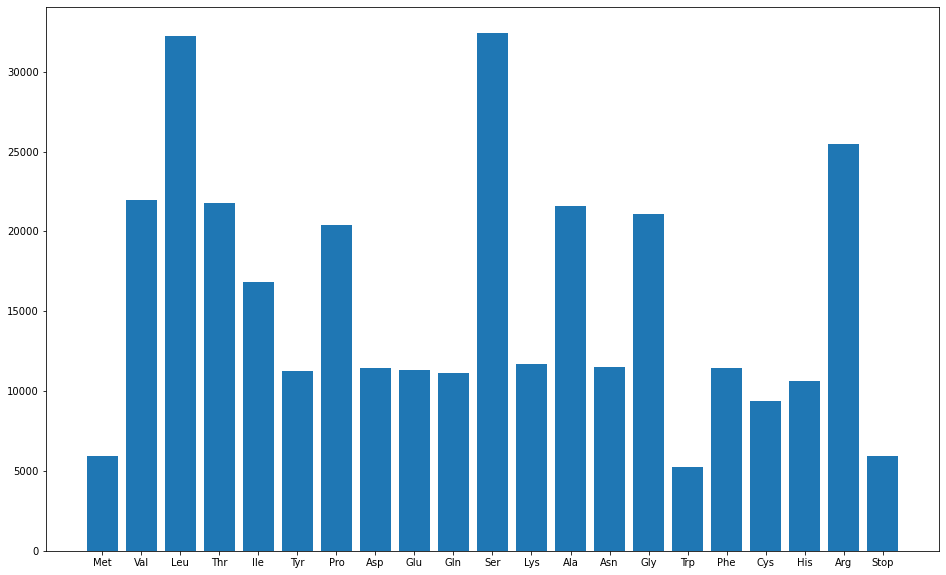

In [14]:
res = {}

for record_key in records.keys():
    nuc_seq = records[record_key].seq
    codons = extract_triplets(str(nuc_seq))
    for codon in codons.keys():
        acid = transl[codon]
        if acid in res.keys():
            res[acid] += 1
        else:
            res[acid] = 1

_, ax = plt.subplots(figsize=(16, 10))
ax.bar(x=list(res.keys()), height=list(res.values()))
plt.show()


## Problem 1c

Split each coding sequences to codons (triplet that do not overlap). Make a barchart showing the numbers of each codon (64 altogether) order by the most often used amino-acid and its most often used codon, its second most used codon etc. (label the chart by both the codon and its amino-acid).


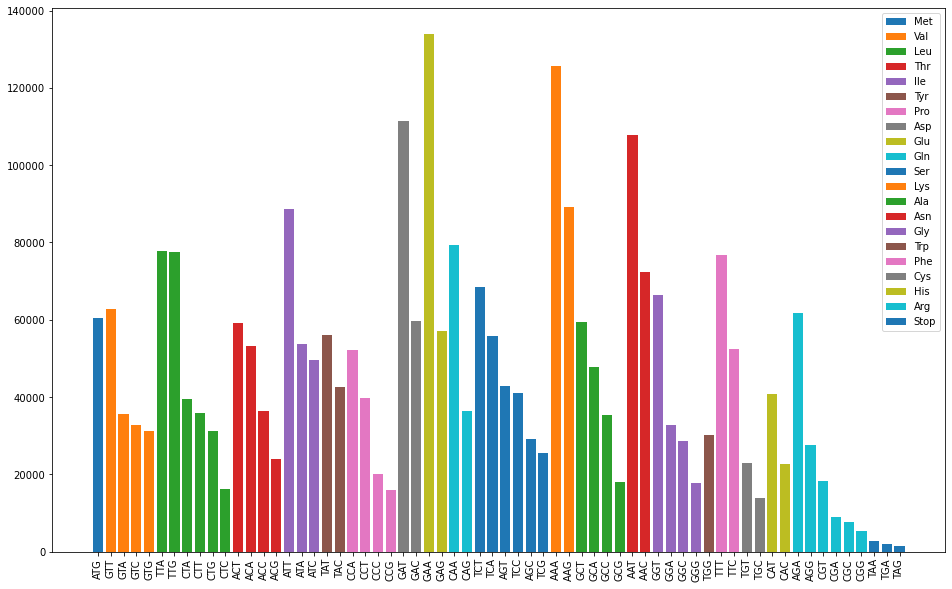

In [15]:
res = {}

for record_key in records.keys():
    nuc_seq = records[record_key].seq
    codons = extract_triplets(str(nuc_seq))
    for codon, amount in codons.items():
        acid = transl[codon]
        if acid in res:
            if codon in res[acid].keys():
                res[acid][codon] += amount
            else:
                res[acid][codon] = amount
        else:
            res[acid] = {codon: amount}

_, ax = plt.subplots(figsize=(16, 10))

for acid, codon_sums in res.items():
    codon_sums = dict(
        sorted(codon_sums.items(), key=lambda item: item[1], reverse=True)
    )
    bars = ax.bar(
        x=list(codon_sums.keys()),
        height=codon_sums.values(),
        label=acid,
    )

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

ax.legend()

plt.show()


## Problem 1d

From the codon frequency data, focus your attention to codons that code for the same amino-acid. Just by looking can you identify big differences in the particular codons that are being used to make a particular amino-acid? (Hint, look at Figure 2 of ["JB Plotkin, G Kudla: Synonymous but not the same: the causes and consequences of codon bias"](https://www.nature.com/articles/nrg2899)).


## Problem 2: Binding energy statistics in the yeast genome (intergenic regions)


Here we analyse signatures of selection from genomic data using transcription factor binding sites as an example. See e.g. ["Kinney JB, Tkacik G, Callan CG (2007) Precise physical models of protein-DNA interaction from high-throughput data. Proc Natl Acad Sci USA 104(2):501–506"](http://www.pnas.org/content/104/2/501.short) and ["Mustonen V, Kinney J, Callan CG, Lässig M (2008) Energy-dependent fitness: a quantitative model for the evolution of yeast transcription factor binding sites. Proc Natl Acad Sci USA 105(34):12376–12381"](http://www.pnas.org/content/105/34/12376.short).

Directory `data/` contains a file `alignment.txt.NaN.removed` where intergenic sequences for four yeast species (_S.cer, S.par, S.mik, S.bay_) are given. Note we have removed insertions and deletions from the alignment so that analyses which in this assignment focus on a single species aspects are a bit simpler.


In [16]:
from setup import *
%matplotlib inline

In [17]:
# import data to a dataframe
datafile = "data/alignment.txt.NaN.removed"
seq_igs = pd.read_csv(datafile, sep="\s+")
tfBindingFile = "data/Emat.abf1.kinney"
# imports an energy matrix modelling transcription factor to DNA binding for factor Abf1
# the dimensions are 4 x 20, correspoding to the four nucleotides A,C,G,T and the binding sites motif length 20
# smaller energy values indicate better binding
Emat = np.array(pd.read_csv(tfBindingFile, header=None, sep="\s+"))


In [18]:
def getEnergy(seq: str, Emat: np.ndarray) -> list[float]:
    """
    function, which returns list on numeric values,
    where each number represents energy of a single
    nucleus.
    input: seg - nucleutide sequence,
    Emat - 4 x 20 matrix of numeric values
    """
    s1 = list(seq.
              replace('A', '0').
              replace('C', '1').
              replace('G', '2').
              replace('T', '3').
              replace('N', '4')
              )  # Converts every nucleus with a numeric value
    Lmat = Emat.shape[1]  # Length of a matrix
    Lseq = len(s1)  # Length of a sequence
    Ev = []
    for i in range(0, Lseq-Lmat+1):  # Loops through
        E = 0.0
        k = 0
        flag = 0
        eps = 0.0
        for j in range(i, i+Lmat):
            nuc = int(s1[j])
            if nuc < 4:
                eps = Emat[nuc, k]
            else:
                # remove sequences with missing data
                flag = 1
            E += eps
            k += 1
        if flag == 0:
            Ev.append(E)
    return Ev


In [19]:
def randomise(seq: str) -> str:
    """
    function, which assigns to each nucleus
    in a sequence a numeric value (A: 0, C: 1, G: 2, T: 3, N: 4),
    shuffles the resulting number sequence
    and returns the shuffled list
    """
    s1 = list(seq.
              replace('A', '0').
              replace('C', '1').
              replace('G', '2').
              replace('T', '3').
              replace('N', '4')
              )
    random.shuffle(s1)
    return "".join(s1)


#### Problem 2a:

Visualise the binding energy matrix _Emat_ with elements $\epsilon_k(a)$ where $k$ denotes column (binding site position) and $a \in{A,C,G,T}$ nucleotides. What is the best possible binding sequence according to this model?


high energy sequence: CCATATTAAGATATAACTTT


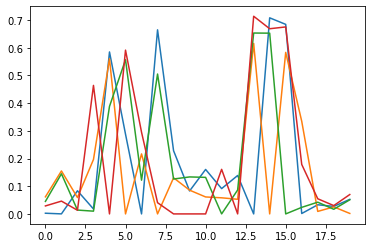

In [54]:
def get_nuc_by_index(index: float) -> str:
    # Get the column of a Emat matrix from index and get the index of a list in which is the greatest value
    a = np.argmax([Emat[:, index]])
    if a == 0:
        return "A"
    elif a == 1:
        return "C"
    elif a == 2:
        return "G"
    elif a == 3:
        return "T"
    else:
        return "_"


plt.plot(Emat[0, ])
plt.plot(Emat[1, ])
plt.plot(Emat[2, ])
plt.plot((Emat[3, ]))

seq = ""
for i in range(20):
    seq = seq + get_nuc_by_index(i)

print("high energy sequence:", seq)


#### Problem 2b:

Explain what the functions `getEnergy()` and `randomise()` do, and add some comments to the code to help a reader understand how they work.


#### Problem 2c:

Now, run the cell below (takes ~1 minute) and put a comment on each line to explain what it does. Plot a histogram of EvAll (use logarithmic y-axis).


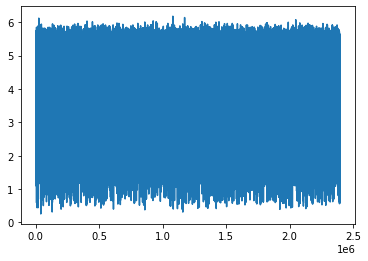

In [21]:
Nigs = seq_igs.shape[0]
Eigs = []
for n in range(0, Nigs):
    seq = seq_igs['Scer'][n]
    Eigs.append(getEnergy(seq, Emat))

EvAll = [val for sublist in Eigs for val in sublist]

plt.plot(EvAll)

plt.show()


#### Problem 2d:

In fact, the histogram (2c) does not show all the possible binding sites in intergenic regions because the given sequences represent only the leading strand of DNA. To get the missing half, you can either make a second data set by reverse complementing all intergenic sequence or by reverse complementing the energy matrix (apply that to a new energy matrix by copy-pasting the code from 1c and modifying it as needed; hint: np.fliplr() and np.flipud might be useful). Make a histogram as in 1c but now for all data.


#### Problem 2e:

Make a null model by permuting randomly each intergenic sequence using the function randomise() (i.e. copy the code from 2d and add one line with `randomise()`). Plot the counts from the null model together with the real data into a histogram. Comment on what you see. Where is selection visible?
